In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import Tracking_Py
import random

In [2]:
common_filepath = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Headon/featherbud_formation_chicken/Headon_results/mesenchym/video1_slice4/whole_image/avg_data/"
with h5py.File(common_filepath + "U_avg.h5", "r") as file:
    U = file["matrix"][:]
with h5py.File(common_filepath + "V_avg.h5", "r") as file:
    V = file["matrix"][:]

with h5py.File(common_filepath + "M_avg.h5", "r") as file:
    M = file["matrix"][:]
    
with h5py.File(common_filepath + "xgrid_matrix", "r") as file:
    xgrid = file["matrix"][:]
    
with h5py.File(common_filepath + "ygrid_matrix", "r") as file:
    ygrid = file["matrix"][:]

In [6]:
np.shape(U)

(185, 63, 63)

# Pseudo trajectories with the whole image

Generate pseudo trajectories based on PIV results of the whole image. Randomly picking the start points inside the image. Also allow the specification of start and end frames. Has the advantage that the tracks are not in one limited region of aggregates/vector fields. Allow more complete tracking and therefore less error with tracks (especially long tracks)

In [14]:
# Giving random start points (In pixel coordinates. Can also defining specific starts and end positions).
start_x_array = [[random.randint(0,1000)] for i in range(500)]
start_y_array = [[random.randint(0,1000)] for i in range(500)]
# Giving the time interval (frames). 
t_array = [[0, 50]]*len(start_x_array)
# Apply the function from Tracking.Py module to generate x and y (pixel) coordinates for pseudo trajectories. 
whole_img_x, whole_img_y = Tracking_Py.pseudo_tracking_piv_grid_v2(U, V, t_array,
                                                                  start_x_array,
                                                                  start_y_array, 16)

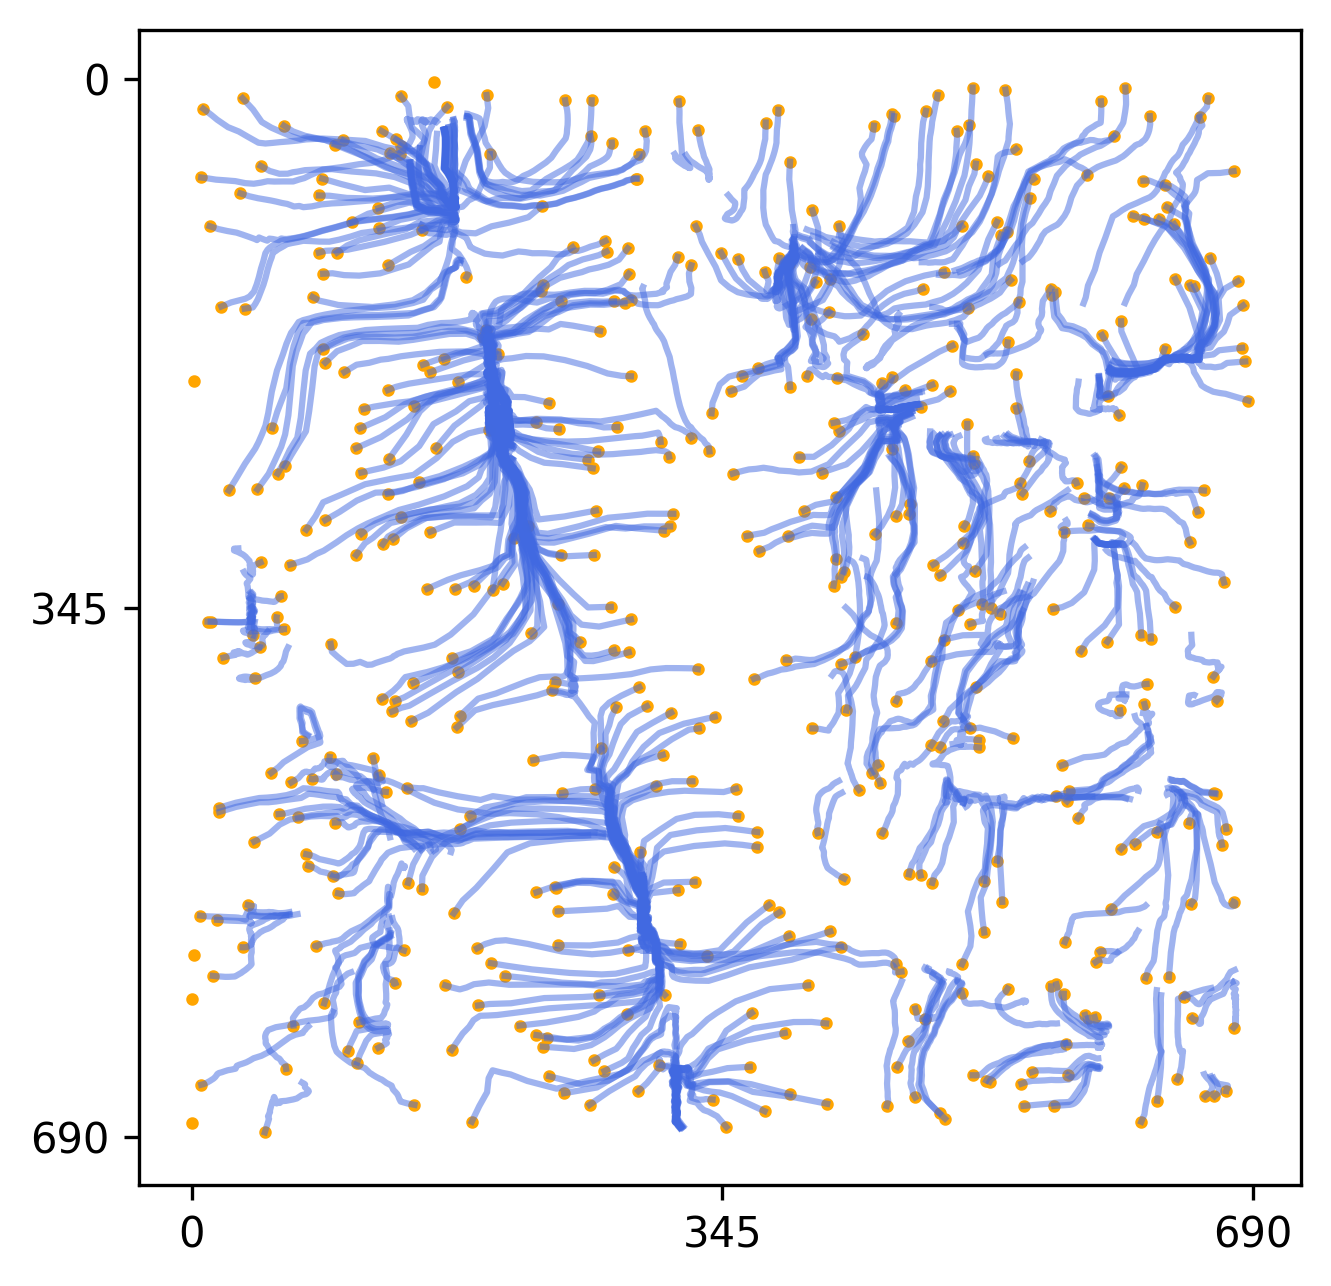

In [15]:
plt.figure(figsize=(5,5), dpi=300)
#plt.quiver(xgrid[80], ygrid[80], V[130], -U[130])
for i in range(len(start_x_array)): 
    # plt.scatter(whole_img_x[i], whole_img_y[i], color = "royalblue", s=1, alpha=0.5)
    plt.scatter(start_x_array[i], start_y_array[i], color = "orange", s=4)
    plt.plot(whole_img_x[i], whole_img_y[i], color = "royalblue", alpha=0.5)

pxl_conversion = 0.69
plt.yticks([0, 500, 1000], (np.array([0, 500, 1000])*pxl_conversion).astype(int))
#plt.ylabel("distance (μm)")
plt.xticks([0, 500, 1000], (np.array([0, 500, 1000])*pxl_conversion).astype(int))
#plt.xlabel("distance (μm)")
plt.savefig("featherbud_pseudo_track_t0-50.svg", format="svg")
plt.gca().invert_yaxis()
plt.show()